<a href="https://colab.research.google.com/github/ashtheflash1212/Linear-Polynomial-Regression/blob/main/Student_Performance_Index_Linear_Regression_%26_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor


In [78]:
df = pd.read_csv("/content/Student_Performance.csv")
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [51]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype('category')
df['Extracurricular Activities'] = df['Extracurricular Activities'].cat.codes
x = df.drop(columns="Performance Index")
y = df["Performance Index"]


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=1/3, random_state=0)


In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
import matplotlib.pyplot as plt


In [55]:
lr.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred_train = lr.predict(x_train)

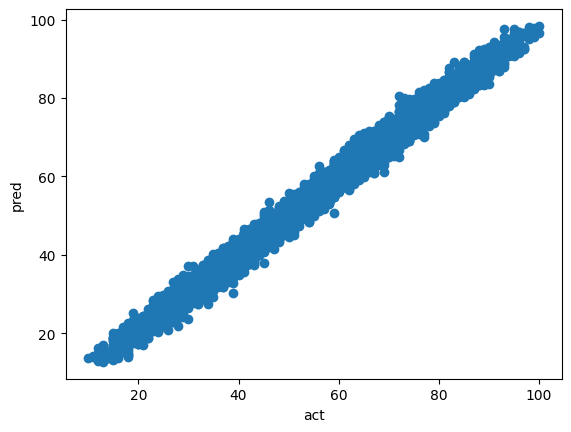

4.210148998742278

In [57]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_pred_train)
plt.scatter(y_train, y_pred_train)
plt.xlabel("act")
plt.ylabel("pred")
plt.show()

mse

In [64]:
import math

y_predict = lr.predict(x_test)
print("Test Data")
x_test


Test Data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9394,4,67,0,9,3
898,8,60,0,4,7
2398,6,90,0,5,6
5906,1,51,1,6,6
2343,2,90,0,5,9
...,...,...,...,...,...
5032,2,92,0,4,5
8898,7,49,1,6,4
2038,1,43,0,8,6
7184,4,44,0,5,6


In [66]:
y_pred_df = pd.DataFrame({"Predictions": y_predict})
print("Predictions")
y_pred_df

Predictions


,Predictions
0,50.464619
1,53.074754
2,78.265943
3,25.379606
4,67.444804
...,...
3329,68.267698
3330,40.035746
3331,17.540561
3332,25.670493


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing as pp


In [70]:
degree = 4  # Specify the degree of the polynomial - Best Degree to Fix Overfitting
poly = PolynomialFeatures(degree=degree)
x_poly_train = poly.fit_transform(x_train_scaler)
x_test_poly = poly.transform(x_test_scaler)
poly.fit(x_poly_train, y_train)
lr.fit(x_poly_train,y_train)


LinearRegression()

In [71]:
y_pred = lr.predict(x_test_poly)

In [72]:
mse = mean_squared_error(y_test, y_pred)
mse

4.096061575470474

In [73]:
y_pred_train = lr.predict(x_poly_train)

In [74]:
mse = mean_squared_error(y_train, y_pred_train)
mse

4.147938113865161

In [75]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9394,4,67,0,9,3
898,8,60,0,4,7
2398,6,90,0,5,6
5906,1,51,1,6,6
2343,2,90,0,5,9
...,...,...,...,...,...
5032,2,92,0,4,5
8898,7,49,1,6,4
2038,1,43,0,8,6
7184,4,44,0,5,6


In [77]:
y_pred_df = pd.DataFrame({"Predictions": y_pred})
print("Predictions")
y_pred_df


Predictions


,Predictions
0,50.335369
1,52.952042
2,78.159592
3,25.813490
4,67.057323
...,...
3329,68.259317
3330,39.930452
3331,17.793894
3332,25.871750
